In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

def Variance (x):
    n = len(x)
    return np.sum((x-np.average(x))**2)/(n-1)

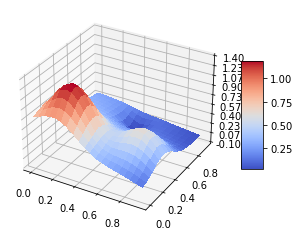

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [5]:
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X
# The design matrix is set up as 1,x,y,x**2,x*y,y**2

In [6]:
n_samples = 100

maxdegree = 5


np.random.seed(1)
x0 = np.random.rand(n_samples)
np.random.seed(2)
y0 = np.random.rand(n_samples)

x,y = np.meshgrid(x0,y0)

In [12]:
np.shape(np.meshgrid(x0,y0))

(2, 100, 100)

(10000, 21)
[ 0.02334445 -0.05955391  0.01632039 ...  0.09084874 -0.07114985
 -0.07525706]
(10000,)
MSE Test
0.011713591491214473
MSE Train
0.011724896143763602
0.8578418989250801
0.8633055029049442


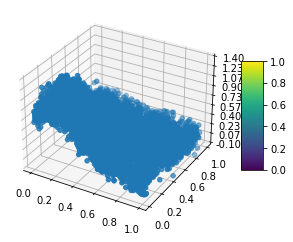

In [19]:
X = create_X(x,y,maxdegree)
print(X.shape)

noise = 0.1*np.random.randn(X.shape[0])
print(noise)

z = FrankeFunction(X[:,1],X[:,2]) + noise
print(z.shape)


X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)


beta_ols = np.linalg.pinv(X_train.T@X_train)@(X_train.T)@z_train

z_train_tilde_ols = X_train@beta_ols
z_test_tilde_ols = X_test@beta_ols

mse_train = mean_squared_error(z_train,z_train_tilde_ols)
mse_test = mean_squared_error(z_test,z_test_tilde_ols)

r2_train = r2_score(z_train,z_train_tilde_ols)
r2_test = r2_score(z_test,z_test_tilde_ols)
print('MSE Test')
print(mse_test)
print('MSE Train')
print(mse_train)

print(r2_test)
print(r2_train)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.scatter3D(X[:,1],X[:,2], z, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [23]:
# It could be interesting to see how the noise affects the MSE of the 
# train and test data

amp = np.array([0.0 , 0.01, 0.1 , 10 ])
for i in range(len(amp)):
    noise = amp[i]*np.random.randn(X.shape[0])
    z = FrankeFunction(X[:,1],X[:,2]) + noise
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)


    beta_ols = np.linalg.pinv(X_train.T@X_train)@(X_train.T)@z_train

    z_train_tilde_ols = X_train@beta_ols
    z_test_tilde_ols = X_test@beta_ols

    mse_train = mean_squared_error(z_train,z_train_tilde_ols)
    mse_test = mean_squared_error(z_test,z_test_tilde_ols)

    r2_train = r2_score(z_train,z_train_tilde_ols)
    r2_test = r2_score(z_test,z_test_tilde_ols)
    print('MSE Train for {}'.format(amp[i]))
    print(mse_train)
    print('MSE Test')
    print(mse_test)
    print('')
    

MSE Train for 0.0
0.0019775453463695847
MSE Test
0.0020588225490769814

MSE Train for 0.01
0.0020674186428101724
MSE Test
0.0021769032101153505

MSE Train for 0.1
0.01197740235516757
MSE Test
0.0119017860172706

MSE Train for 10.0
100.56999452406707
MSE Test
101.09832226232867



In [32]:
# We havent computed the variances for the parameters...
Varz = Variance(z)
VarPar = Varz*np.diagonal(np.linalg.inv(X.T.dot(X)))
np.sqrt(VarPar)

array([  1.58494976,  17.35130366,  19.29212621,  84.1686683 ,
        68.58772332,  96.19162472, 191.58823689, 151.83197868,
       150.17183304, 220.08014214, 204.45397449, 174.46817848,
       150.4727293 , 163.10697802, 232.39144073,  82.3757759 ,
        81.40926439,  70.23168737,  72.45260723,  72.84388221,
        91.48203293])

In [31]:
beta_ols

array([  -1.78164444,   19.70866224,   31.94933966,  -31.13794601,
       -114.25871337, -144.92900101,  -45.10245672,  315.17306489,
         84.19920534,  321.98729352,  108.05047205, -304.08048002,
       -169.24648171,  -22.1788722 , -316.86860646,  -51.74767212,
         93.06781967,   98.03220157,   18.21112296,    2.73055055,
        111.04401268])

In [30]:
#1.  We have also done no scaling of the data
#2. We have not calculated the confidence intervals for the parameters

(10000, 21)

In [33]:
# For finding for example the 95% there may be multiple ways of doing it
# One is repeating the fit 100 times, see where 95 percent of values
# fall and plot this on an histogram

# The only problem is we have 21 parameters, so no way we can compare all
'''
For high degrees of freedom the t distribution resembles a gaussian
SO the variance gives 1sigma, 68% of CI, 2sigma 95% ... 
Should we check this numerically? for at least 1 parameter?
'''

'\nFor high degrees of freedom the t distribution resembles a gaussian\nSO the variance gives 1sigma, 68% of CI, 2sigma 95% ... \nShould we check this numerically? for at least 1 parameter?\n'

In [44]:
# Now I want to find the MSE as a function of the model complexity

degree = np.array([1 , 2, 3 ,4 ,5,6 ,7,8,9,10,11,12,13])
MSETrain = []
MSETest = []
for i in range(len(degree)):
    dof = degree[i]
    X = create_X(x,y,maxdegree)
    z = FrankeFunction(X[:,1],X[:,2])
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)
    beta_ols = np.linalg.pinv(X_train.T@X_train)@(X_train.T)@z_train

    z_train_tilde_ols = X_train@beta_ols
    z_test_tilde_ols = X_test@beta_ols

    MSETrain.append(mean_squared_error(z_train,z_train_tilde_ols))
    MSETest.append(mean_squared_error(z_test,z_test_tilde_ols))

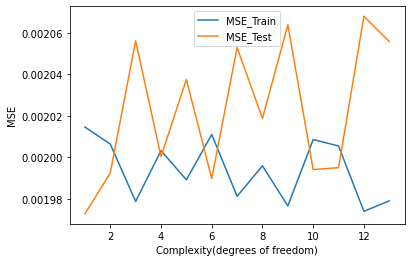

In [45]:
plt.figure()

plt.plot(degree,MSETrain,label='MSE_Train')
plt.plot(degree,MSETest,label='MSE_Test')
plt.xlabel('Complexity(degrees of freedom)')
plt.ylabel('MSE')
plt.legend()
plt.show()